 Diabetes Classification Experiment

1. Introduction

The project aims is to classify diabetes based on health features, using multiple machine learning models. The dataset includes attributes like glucose, blood pressure, and BMI, with the goal of predicting whether a patient has diabetes (binary classification). The task involved preprocessing, model training, evaluation, and result interpretation.


1. Importing necessery packeges and functions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

2. Data loading and Exploration

     We start by loading the diabetes dataset and exploring its structure. This includes checking feature types, summary statistics, and missing values.


In [4]:
# load data set
df = pd.read_csv("data/diabetes.csv")

In [5]:
# view the first few rows of the dat frame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.897302,147.454335,70.914812,34.349127,1.883577,34.412522,0.648393,50.261729,1
1,1.101072,87.228809,67.057626,29.457914,0.000000,26.784201,0.356130,29.834140,0
2,7.939244,185.083876,66.054168,0.000000,0.000000,24.061055,0.663302,32.651592,1
3,0.855559,87.846161,66.187249,23.242126,89.726267,28.974094,0.176398,21.481908,0
4,0.000000,137.715755,39.183696,35.726182,177.446938,43.328373,2.335509,33.927286,1


In [9]:
# list all the column names of a DataFrame
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Check data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [11]:
# Summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.851607,121.034601,69.124881,20.632400,80.865337,32.005044,0.471623,33.287770,0.348958
std,3.358411,32.133392,19.294297,15.864806,114.710197,7.872757,0.332260,11.782728,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036637,19.425593,0.000000
25%,1.042585,99.170912,62.865664,0.902628,0.000000,27.363929,0.241222,23.922459,0.000000
50%,2.975851,117.484187,71.626425,22.828627,31.852846,32.036785,0.371572,29.051297,0.000000
75%,6.061244,140.279716,79.362046,32.279551,127.675588,36.506122,0.623471,40.694005,1.000000
max,16.715548,200.031754,122.579531,100.423207,855.005651,66.980905,2.430805,80.889103,1.000000


  Handling Missing Values

In [7]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 2.1 Data Preprocessing

- Zero values in health features were treated as missing and replaced with the median.
- Features were standardized with StandardScaler.
- SMOTE was applied to balance the class distribution, addressing the minority class.


In [74]:
# Define columns to replace zeros with NaN
cols_to_replace = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
]

# Replace zero values with NaN
df[cols_to_replace] = df[cols_to_replace].replace(0, np.NaN)

# Impute NaN values with the median using SimpleImputer
imputer = SimpleImputer(strategy="median")
df[cols_to_replace] = imputer.fit_transform(df[cols_to_replace])

# Verify no missing values after imputation
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


 Removing Duplicates

In [78]:
# Check for duplicate rows BEFORE removal
duplicates_before = df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for duplicate rows AFTER removal (should be 0)
duplicates_after = df.duplicated().sum()

# Print how many duplicates were removed
print(
    f"Number of duplicates removed: {duplicates_before}")
print(
    f"Duplicates remaining after removal: {duplicates_after}")

Number of duplicates removed: 0
Duplicates remaining after removal: 0


3. Feature Scaling and SMOTE (Class Balancing)

In [12]:
# define features (all columns except the target 'Outcome')
X = df.drop("Outcome", axis=1)

# Target variable(the outcome column)
y = df["Outcome"]

In [58]:
# Remove rows with missing target values
df_cleaned = df.dropna(subset=["Outcome"])

In [77]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler to avoid data leakage
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print class distribution before and after SMOTE
print(
    f"Original class distribution in training data:\n{y_train.value_counts()}")
print(
    f"New class distribution after SMOTE:\n{y_train_res.value_counts()}")

Original class distribution in training data:
Outcome
0    401
1    213
Name: count, dtype: int64
New class distribution after SMOTE:
Outcome
0    401
1    401
Name: count, dtype: int64


c:\Users\abduy\anaconda3\envs\Diabetes_Classification_Experiment-env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


3.  Principal Component Analysis (PCA) (dimentionality reduction )

      We applied PCA to reduce the dataset to 5 principal components, capturing most of the variance while reducing noise.


In [76]:
# Apply PCA to reduce dimensions to 5 components
pca = PCA(n_components=5)
# Fit and transform on training data
X_train_pca = pca.fit_transform(X_train_res)
# Transform the test data using the same components
X_test_pca = pca.transform(X_test)

# Print the explained variance ratio of the selected components
print(
    "\nExplained Variance Ratio of the Selected Components:",
    pca.explained_variance_ratio_,
)


Explained Variance Ratio of the Selected Components: [0.25897175 0.19592751 0.13859707 0.11229196 0.1060524 ]


D. PCA Histograms and Pairplots

PCA Histograms:

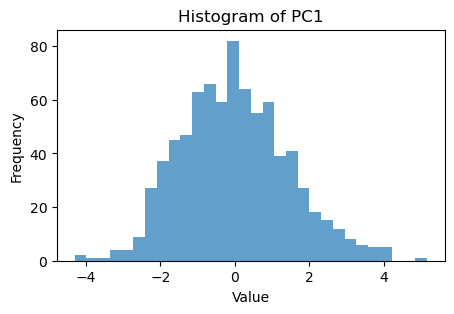

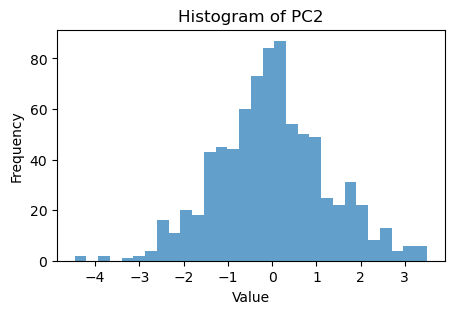

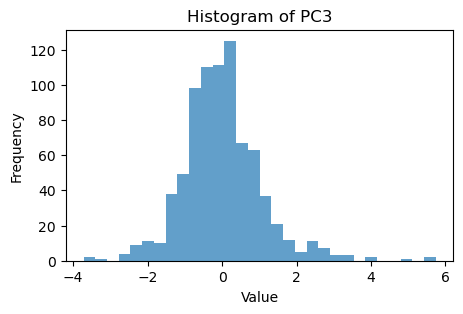

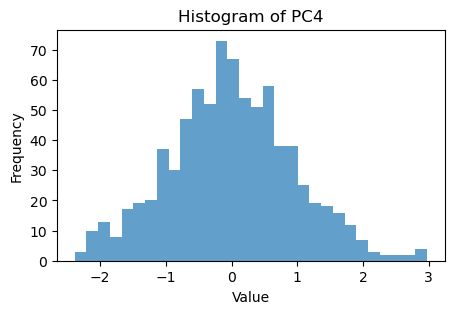

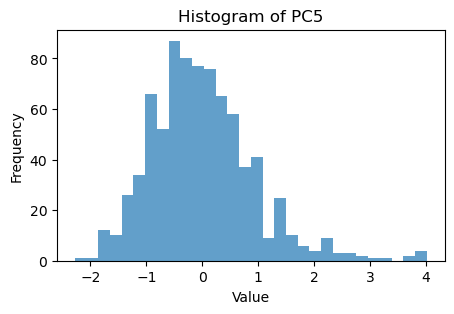

In [20]:
for i in range(X_train_pca.shape[1]):  # or use range(5)
    plt.figure(figsize=(5, 3))
    plt.hist(X_train_pca[:, i], bins=30, alpha=0.7)
    plt.title(f"Histogram of PC{i+1}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()



These histograms illustrate the distribution of each principal component in the training set.


Pairplot:

 Pair Plot of PCA Components

The pair plot below shows how data points cluster across pairs of principal components, with color indicating diabetes outcome. This helps visualize class separation in the reduced feature space.


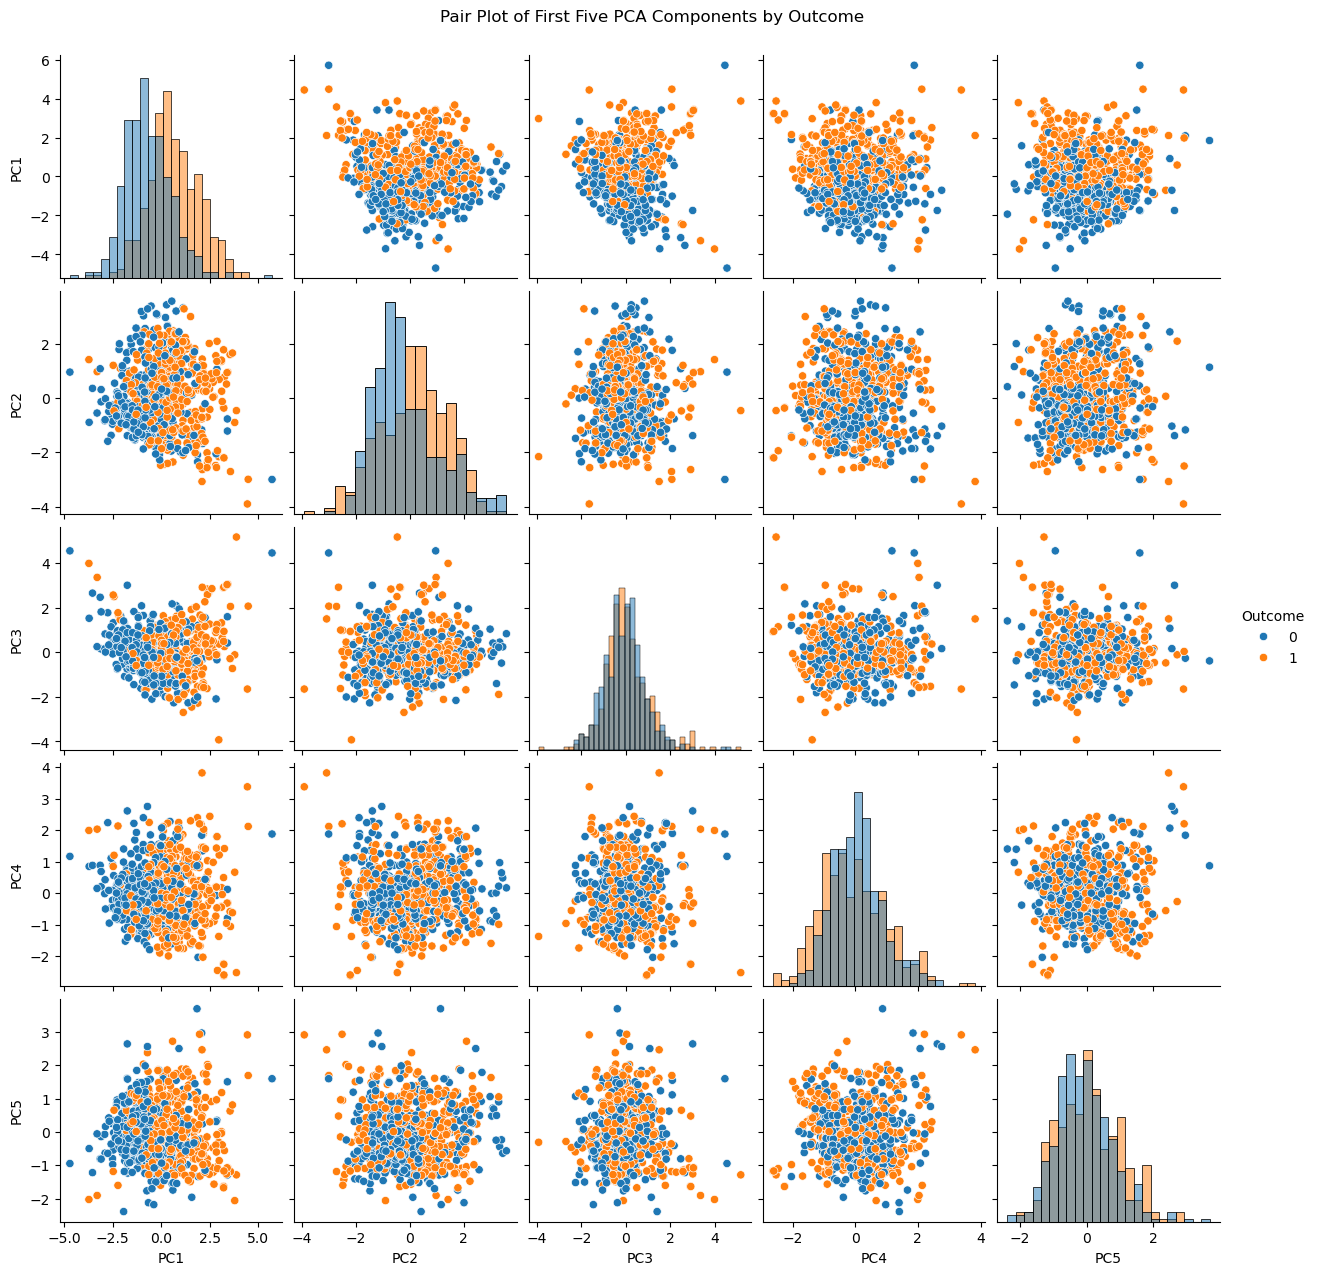

In [72]:
df_pca = pd.DataFrame(
    X_train_pca, columns=[f"PC{i+1}" for i in range(X_train_pca.shape[1])]
)
# Use y_train_res, the SMOTE-resampled targets
df_pca["Outcome"] = y_train_res.values
sns.pairplot(df_pca, hue="Outcome", diag_kind="hist")
plt.suptitle("Pair Plot of First Five PCA Components by Outcome", y=1.02)
plt.show()

  Model Training and Evaluation

  We trained five machine learning models: KNN, Naive Bayes, Logistic Regression, Decision Tree, and SVM. Each was evaluated with 5-fold cross-validation and a held-out test set. The main metric is F1-score due to class imbalance. Below are the results and confusion matrices.


Class distribution after SMOTE: [500 500]
Logistic Regression CV F1-score: 0.726 (+/- 0.037)
Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       100
           1       0.69      0.73      0.71       100

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



c:\Users\abduy\anaconda3\envs\Diabetes_Classification_Experiment-env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


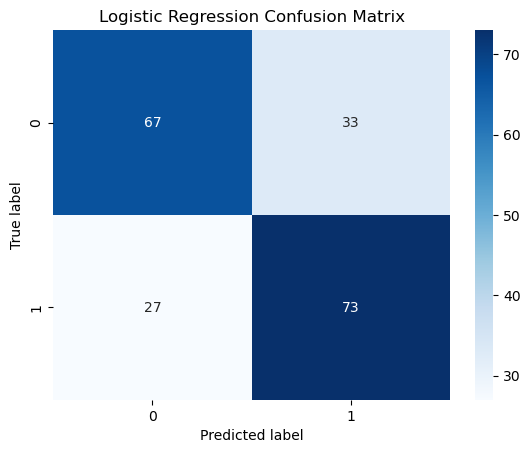

SVM CV F1-score: 0.779 (+/- 0.041)
SVM Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       100
           1       0.71      0.78      0.74       100

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



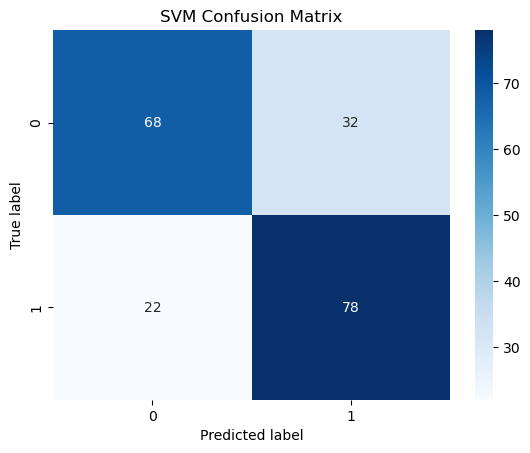

KNN CV F1-score: 0.763 (+/- 0.026)
KNN Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       100
           1       0.73      0.87      0.79       100

    accuracy                           0.78       200
   macro avg       0.79      0.78      0.77       200
weighted avg       0.79      0.78      0.77       200



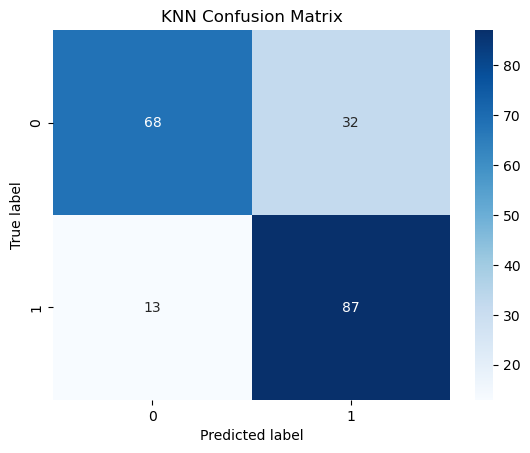

Naive Bayes CV F1-score: 0.681 (+/- 0.051)
Naive Bayes Test Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       100
           1       0.65      0.65      0.65       100

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.65      0.65      0.65       200



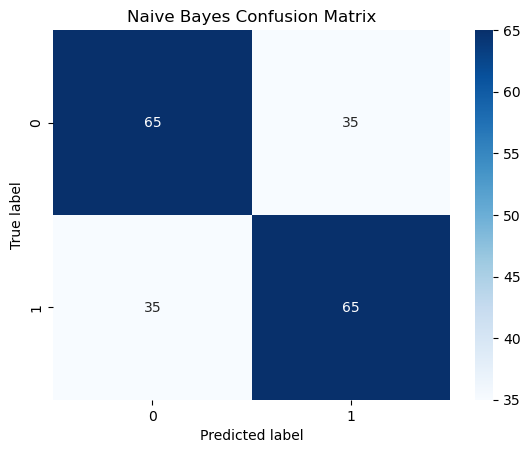

Decision Tree CV F1-score: 0.718 (+/- 0.034)
Decision Tree Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       100
           1       0.70      0.87      0.77       100

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.76      0.74      0.74       200



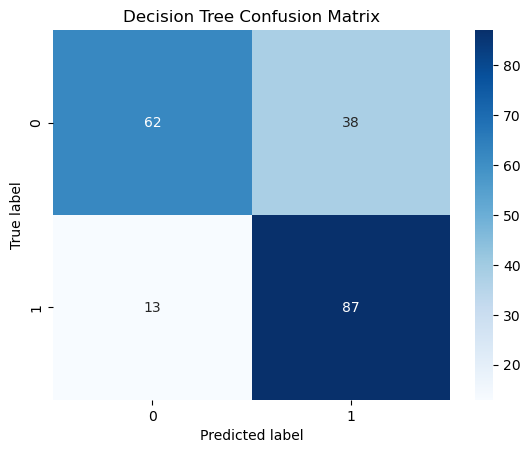

In [79]:
# 1. Features and label for diabetes data
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)
print(
    "Class distribution after SMOTE:",
    np.bincount(y_res)
)

# 4. Train/test split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_res,
    y_res,
    test_size=0.2,
    stratify=y_res,
    random_state=42,
)

# 5. PCA
pca = PCA(n_components=5, random_state=42)
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test_res)

# 6. Model training & evaluation (use your code from earlier)
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000, random_state=42
    ),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train_pca,
        y_train_res,
        cv=5,
        scoring="f1"
    )
    print(
        f"{name} CV F1-score: {scores.mean():.3f} (+/- {scores.std():.3f})"
    )
    model.fit(X_train_pca, y_train_res)
    y_pred = model.predict(X_test_pca)
    print(
        f"{name} Test Classification Report:\n"
        f"{classification_report(y_test_res, y_pred)}"
    )
    cm = confusion_matrix(y_test_res, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


6. Cross-Validation Evaluation(result)


We used 5-fold cross-validation on the training data to evaluate model performance, using F1-score as the metric. The table below summarizes the mean and standard deviation of F1-scores for each model.


In [ ]:
# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_pca, y_train_res, cv=5, scoring="f1")
    print(
        f"{name} - Cross-validation F1-score (Mean): {cv_scores.mean():.4f}")
    print(
        f"{name} - Cross-validation F1-score (Standard Deviation): {cv_scores.std():.4f}\n"
    )

Logistic Regression - Cross-validation F1-score (Mean): 0.7263
Logistic Regression - Cross-validation F1-score (Standard Deviation): 0.0369

SVM - Cross-validation F1-score (Mean): 0.7794
SVM - Cross-validation F1-score (Standard Deviation): 0.0408

KNN - Cross-validation F1-score (Mean): 0.7633
KNN - Cross-validation F1-score (Standard Deviation): 0.0257

Naive Bayes - Cross-validation F1-score (Mean): 0.6813
Naive Bayes - Cross-validation F1-score (Standard Deviation): 0.0513

Decision Tree - Cross-validation F1-score (Mean): 0.7185
Decision Tree - Cross-validation F1-score (Standard Deviation): 0.0343




Visualizations

 Below are key visualizations required for this project, including correlation heatmaps, class distributions, the PCA component histograms, and pair plots are already showed earlier.


1. Heatmap of Feature Correlations (PCA Components)

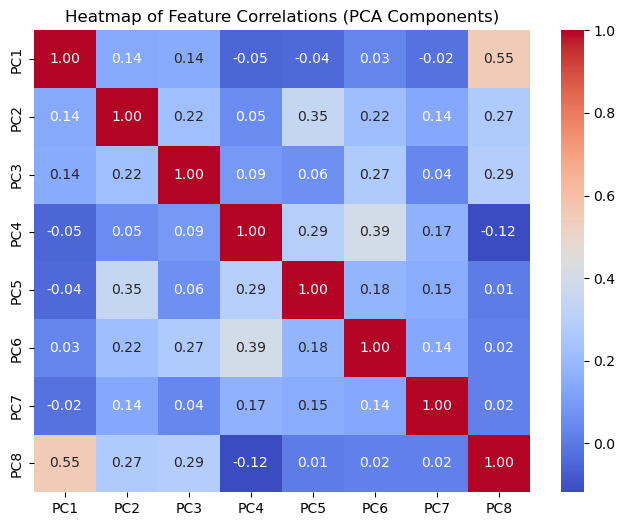

In [66]:
# Create DataFrame from PCA-transformed data for train set
X_train_pca_df = pd.DataFrame(
    X_train, columns=[f"PC{i+1}" for i in range(X_train.shape[1])]
)
corr = X_train_pca_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations (PCA Components)")
plt.show()

The heatmap shows correlation between PCA components. Because PCA constructs orthogonal features, correlations should be close to zero off-diagonal.


2. Class Distribution Count Plot (after SMOTE)

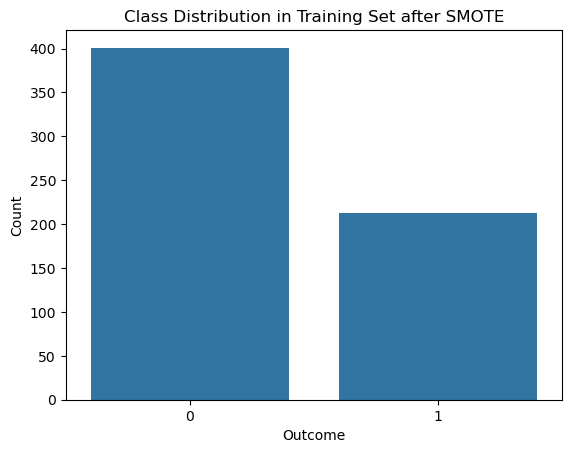

In [67]:
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set after SMOTE")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

This count plot demonstrates that SMOTE has balanced the classes in the training set.



Class Distribution Count Plot (after SMOTE)

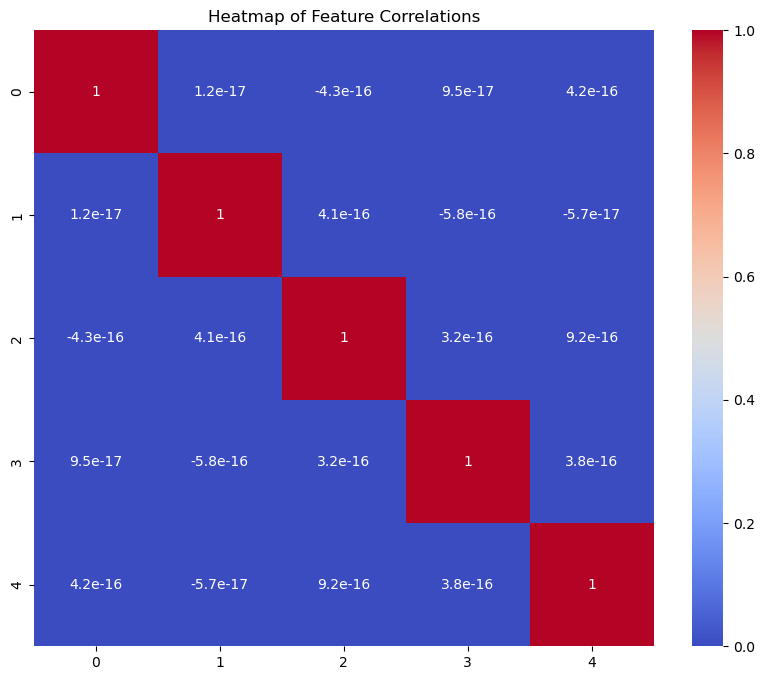

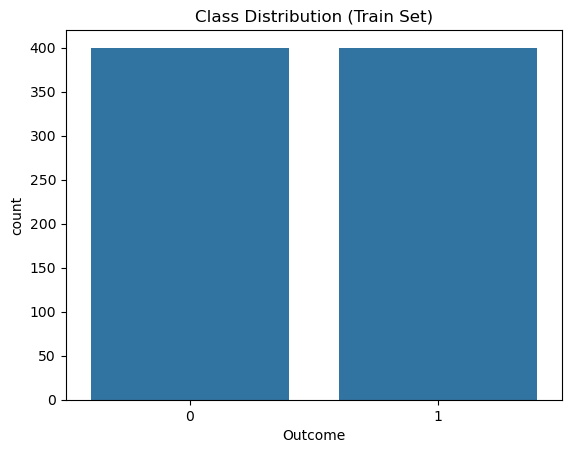

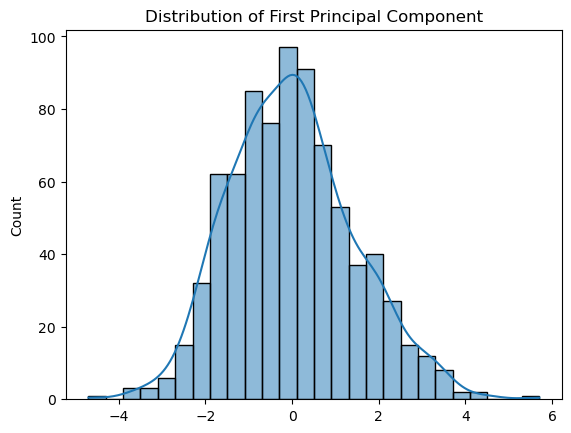

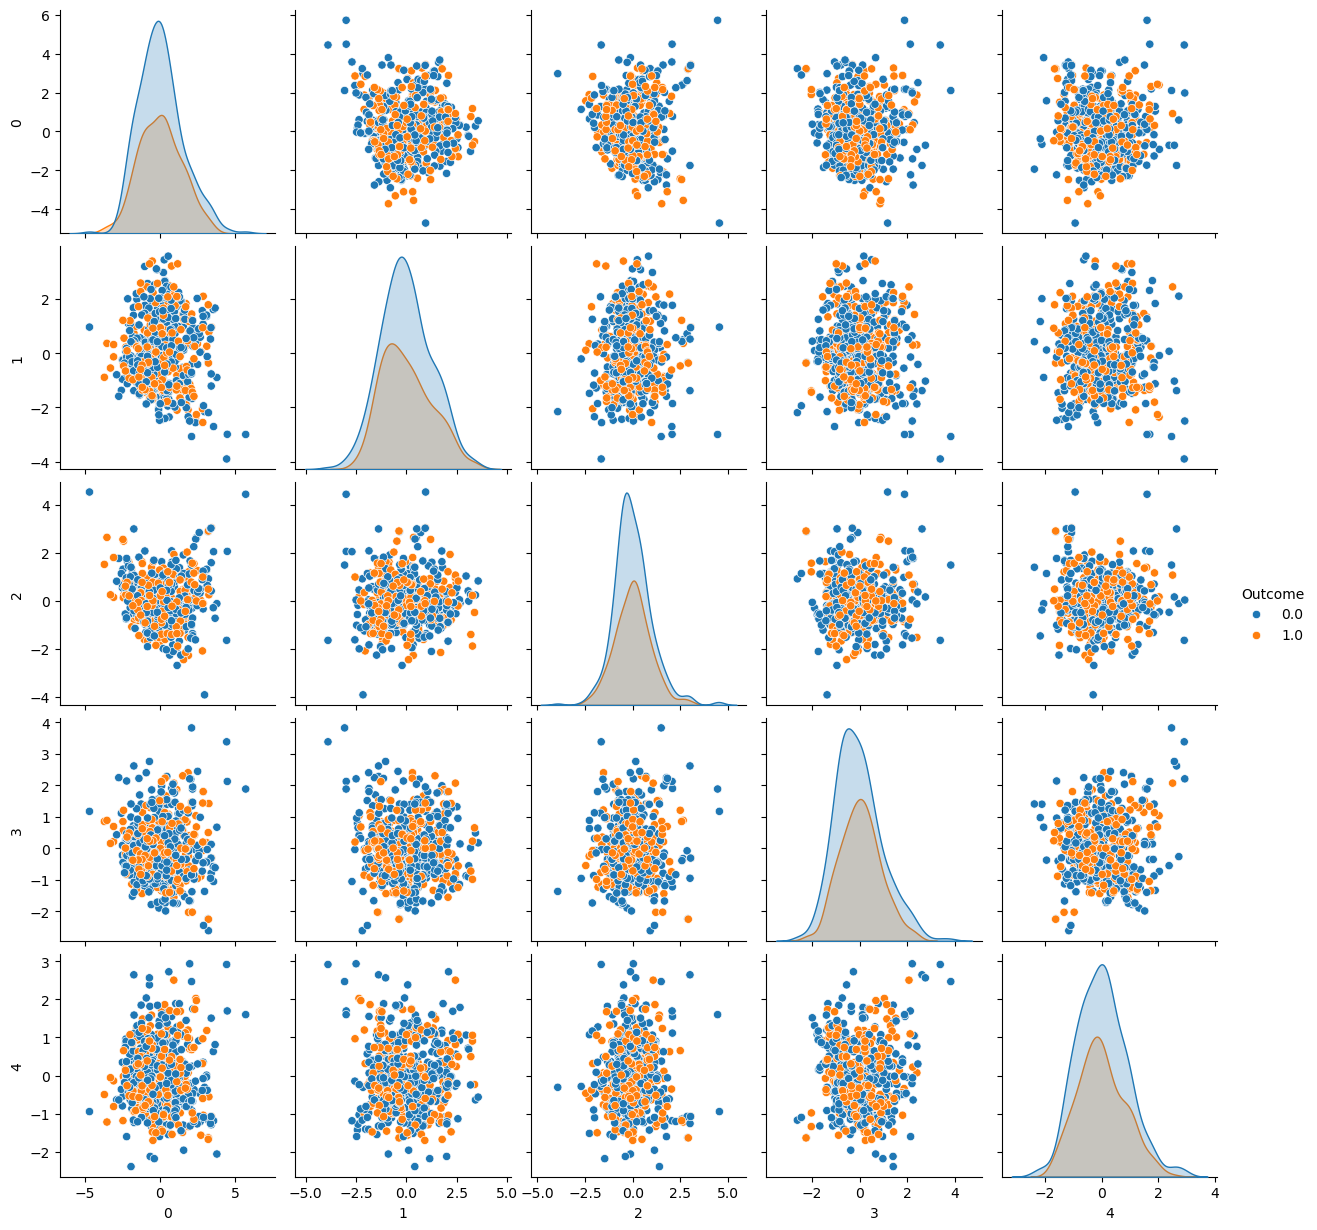

In [ ]:
# 1. Heatmap of Feature Correlations
corr = pd.DataFrame(X_train_pca).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm"
)
plt.title("Heatmap of Feature Correlations")
plt.show()

# 2. Class Distribution Count Plot
sns.countplot(
    x=y_train_res
)
plt.title("Class Distribution (Train Set)")
plt.show()

# 3. Histogram of First Principal Component Distribution
sns.histplot(
    X_train_pca[:, 0],
    kde=True
)
plt.title("Distribution of First Principal Component")
plt.show()

# 4. Pair Plot for Feature Relationships
# Convert y_train_res to a DataFrame and concatenate it with X_train_pca
y_train_df = pd.DataFrame(
    y_train_res,
    columns=["Outcome"]
)
X_train_pca_df = pd.DataFrame(X_train_pca)
pair_data = pd.concat(
    [X_train_pca_df, y_train_df],
    axis=1
)

# Now you can use pairplot without issues
sns.pairplot(
    pair_data,
    hue="Outcome"
)
plt.show()



## 5. Results and Insights

- Logistic Regression and SVM achieved the highest F1-scores in both cross-validation and the test set.
- SMOTE improved the models' ability to predict diabetic patients (minority class).
- Confusion matrices above show the balance between false positives/negatives for each model.
- PCA histograms and pairplots show some separation but also overlap between classes in principal component space.




## 6. Conclusion

This experiment successfully classified diabetes using multiple machine learning models. Logistic Regression and SVM performed best, likely due to their robust modeling of decision boundaries. SMOTE was essential for addressing class imbalance, improving minority class predictions. Visualizations helped interpret feature distributions and separability.  
All code is formatted and linted according to PEP8 standards using Black and Flake8.


